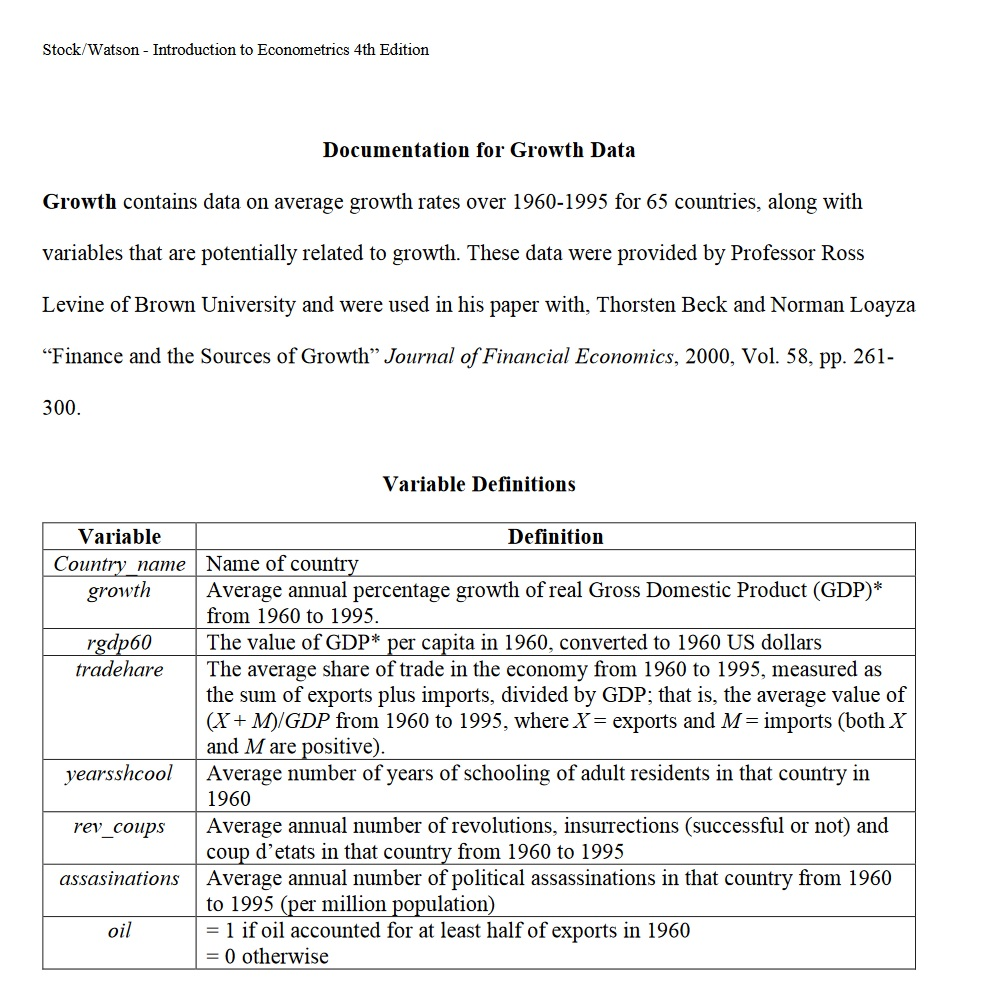

**In this project, which is an econometric project from the book Introduction to Economics by Stock/Watson, there is a dataset containing economic data of 65 countries to investigate the factors affecting their economic growth.
This project has been investigated with the help of linear regression machine learning model, where X is the independent variable and Y, which is the growth column and represents the economic growth of the countries, is the dependent variable or our target.**

In [1]:
#!pip install openpyxl
#!pip install pyarrow

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import pickle

In [3]:
df =pd.read_excel('Growth.xlsx') #read data 

C:\Users\Kasra Tehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333
...,...,...,...,...,...,...,...,...
60,Cyprus,5.384184,0,2037.000366,0.979355,4.29,0.100000,0.166667
61,Malaysia,4.114544,0,1420.000244,1.105364,2.34,0.033333,0.033333
62,Belgium,2.651335,0,5495.001953,1.115917,7.46,0.000000,0.000000
63,Mauritius,3.024178,0,2861.999268,1.127937,2.44,0.000000,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_name   65 non-null     object 
 1   growth         65 non-null     float64
 2   oil            65 non-null     int64  
 3   rgdp60         65 non-null     float64
 4   tradeshare     65 non-null     float64
 5   yearsschool    65 non-null     float64
 6   rev_coups      65 non-null     float64
 7   assasinations  65 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.2+ KB


In [6]:
df['oil'].sum() #this column "oil" is equal to 0 and we can drop it 

0

In [7]:
df.describe() # Some statistical parameters at once

,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
count,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000
mean,1.942715,0.0,3103.784649,0.564703,3.985077,0.167450,0.277564
std,1.897120,0.0,2512.656846,0.289270,2.542000,0.224680,0.491528
min,-2.811944,0.0,366.999939,0.140502,0.200000,0.000000,0.000000
25%,0.838156,0.0,1147.999756,0.393251,1.940000,0.000000,0.000000
50%,1.975147,0.0,2019.000244,0.543337,3.650000,0.066667,0.100000
75%,2.880327,0.0,5143.000977,0.681555,5.560000,0.266667,0.233333
max,7.156855,0.0,9895.003906,1.992616,10.070000,0.970370,2.466667


In [8]:
numerical_df = df.iloc[:,1:] # or " df.loc[:,'growth':] "

## Calculate statistical parameters

In [9]:
mean = numerical_df.mean()

In [10]:
std_deviation = numerical_df.std()

In [11]:
variance = numerical_df.var()

In [12]:
kurtosis = numerical_df.kurtosis()

In [13]:
skewness = numerical_df.skew()

In [14]:
par_name = []
result = []
par_name = ['Mean','Standard Deviation','Variance','Kurtosis','Skewness']
result = [mean,std_deviation,variance,kurtosis,skewness]

In [15]:
df_parameters = pd.DataFrame({'statistical parameters':par_name}) # Create a datafraeme with statistical parameters

In [16]:
df_result = pd.DataFrame(result) # Create a datafraeme with numerical result 

In [17]:
df_result = pd.concat([df_parameters,df_result],axis=1) # Create a dataframe to display the result

In [18]:
df_result 

,statistical parameters,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,Mean,1.942715,0.0,3.103785e+03,0.564703,3.985077,0.167450,0.277564
1,Standard Deviation,1.897120,0.0,2.512657e+03,0.289270,2.542000,0.224680,0.491528
2,Variance,3.599063,0.0,6.313444e+06,0.083677,6.461766,0.050481,0.241600
3,Kurtosis,1.268967,0.0,-1.444619e-01,8.327540,-0.520451,3.504495,8.067367
4,Skewness,0.254635,0.0,9.815545e-01,2.044397,0.530379,1.860845,2.804777


In [19]:
#Print the results 
#for i , resu in enumerate(result):
    #print('***************************')
    #print('---',par_name[i],'---')
    #print (resu)

## Define X , Y

In [20]:
X = df.iloc[:,2:]
Y = df['growth'] # Y is our target

In [21]:
X

,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,0,765.999817,0.140502,1.45,0.133333,0.866667
1,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,0,9895.003906,0.160815,8.66,0.000000,0.433333
...,...,...,...,...,...,...
60,0,2037.000366,0.979355,4.29,0.100000,0.166667
61,0,1420.000244,1.105364,2.34,0.033333,0.033333
62,0,5495.001953,1.115917,7.46,0.000000,0.000000
63,0,2861.999268,1.127937,2.44,0.000000,0.000000


In [22]:
Y

0     1.915168
1     0.617645
2     4.304759
3     2.930097
4     1.712265
        ...   
60    5.384184
61    4.114544
62    2.651335
63    3.024178
64    6.652838
Name: growth, Length: 65, dtype: float64

## Visualization 
Let's create some simple plots to check out the data!

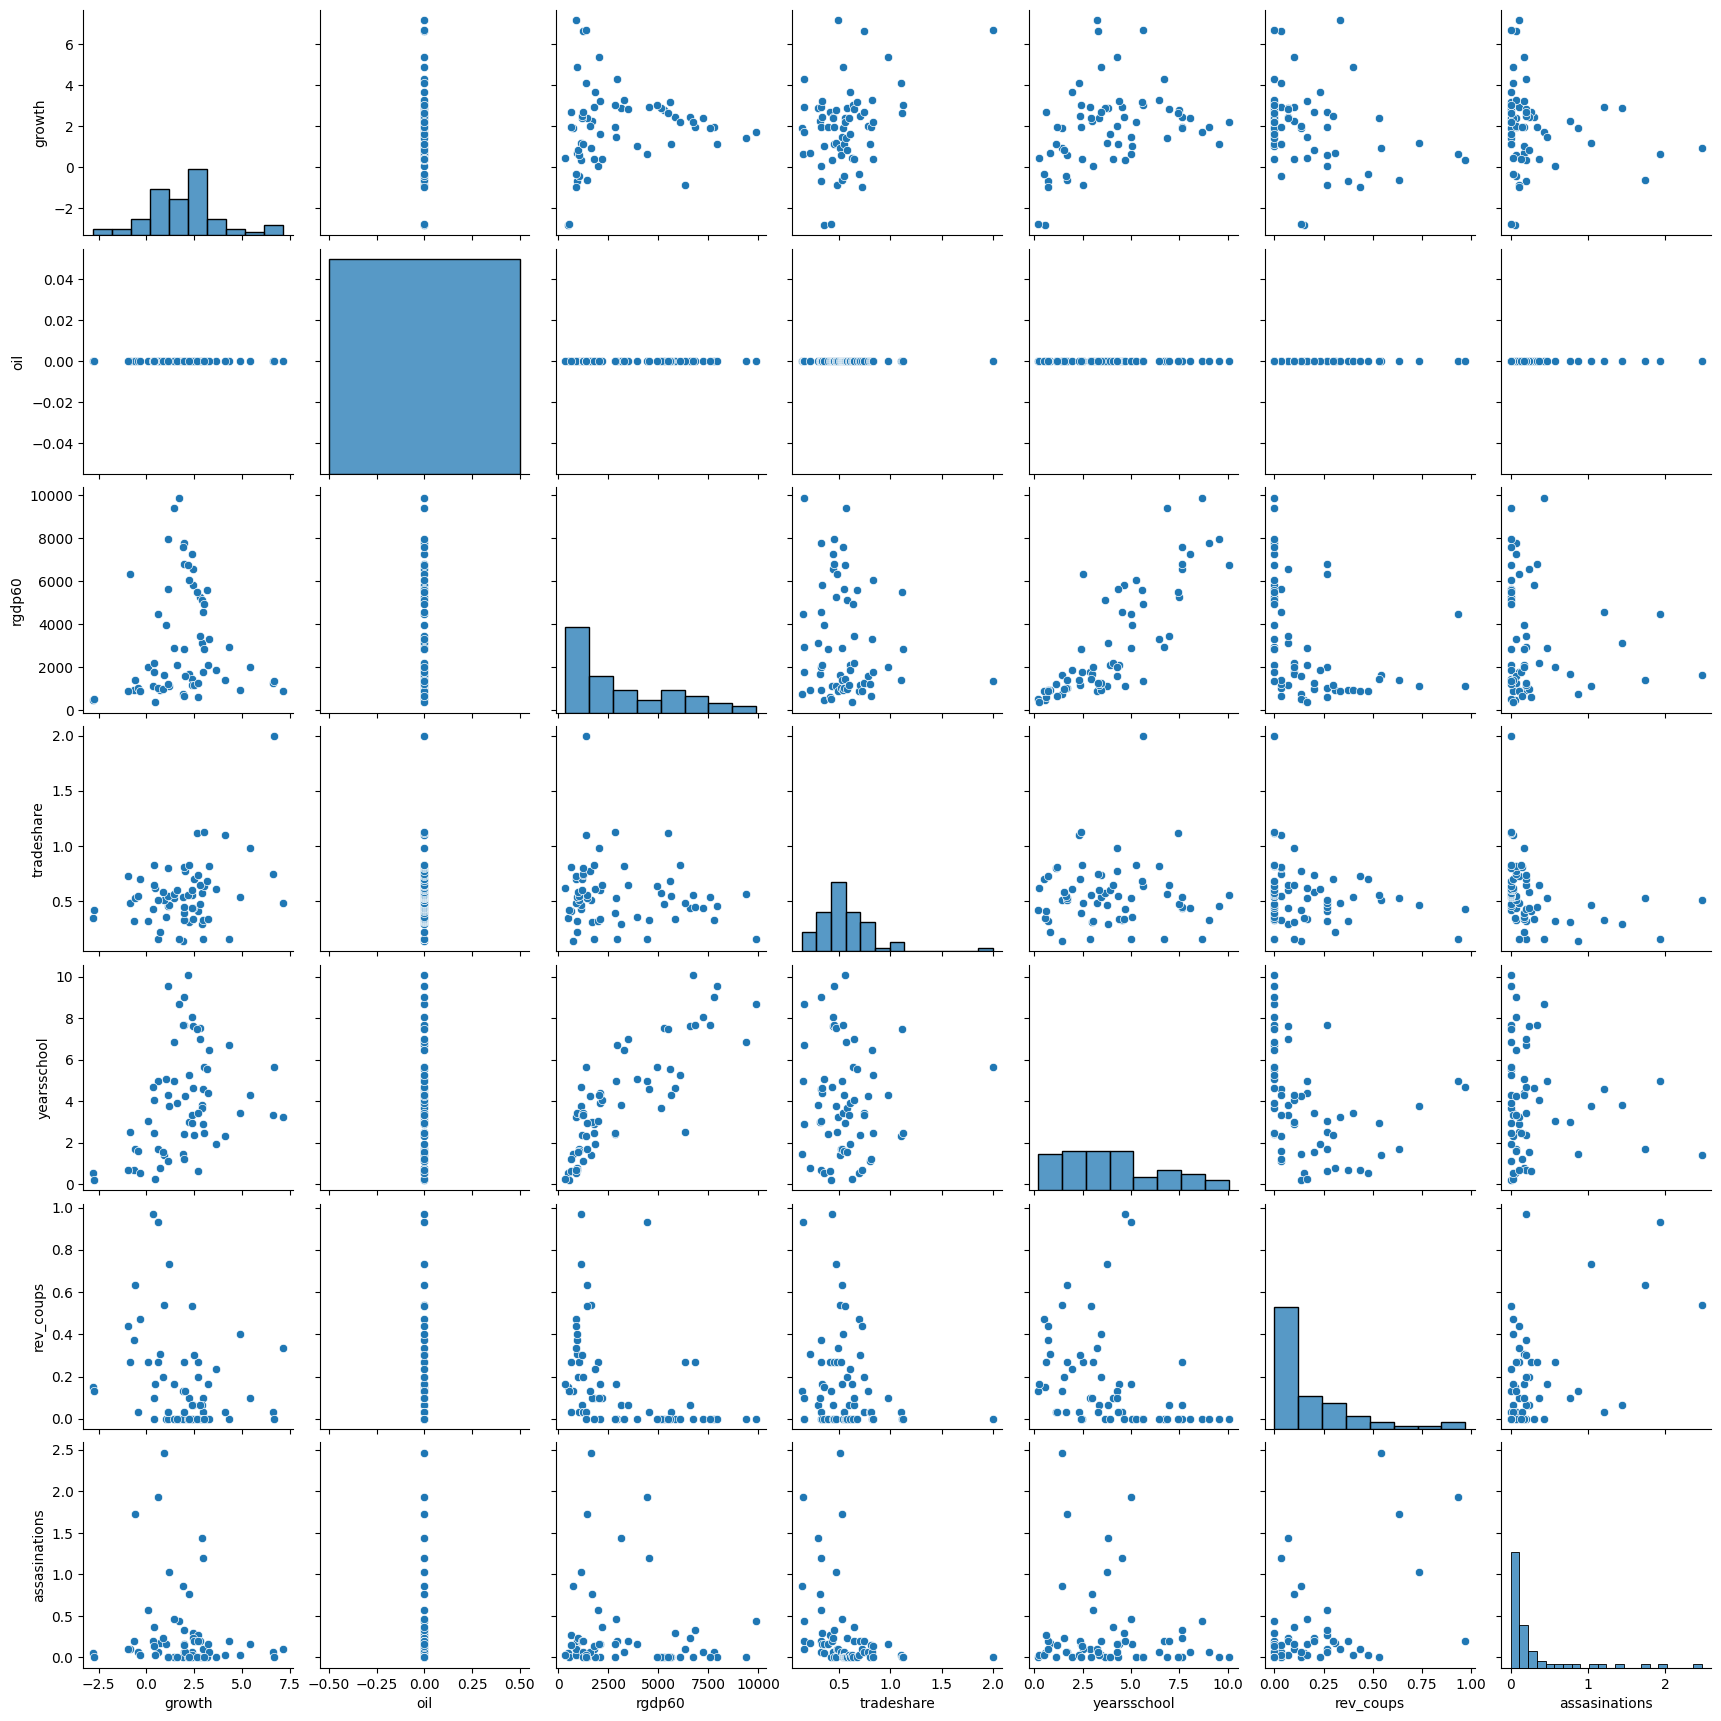

In [23]:
sns.pairplot(numerical_df, diag_kind="hist"); #Plot pairwise relationships in a dataset

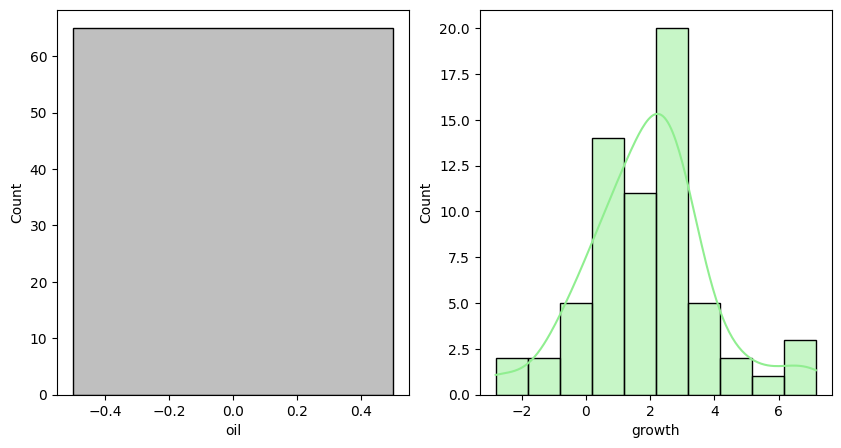

In [24]:
#histogram "oil" vs. "growth" 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=numerical_df, x="growth", kde=True, color="lightgreen", ax=axs[1])
sns.histplot(data=numerical_df, x="oil", kde=True, color="gray", ax=axs[0]);

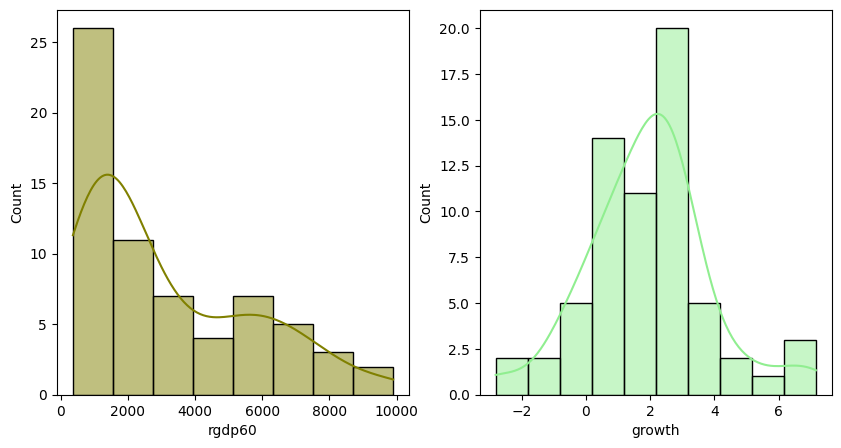

In [25]:
#histogram "rgdp60" vs. "growth" 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=numerical_df, x="growth", kde=True, color="lightgreen", ax=axs[1])
sns.histplot(data=numerical_df, x="rgdp60", kde=True, color="olive", ax=axs[0]);

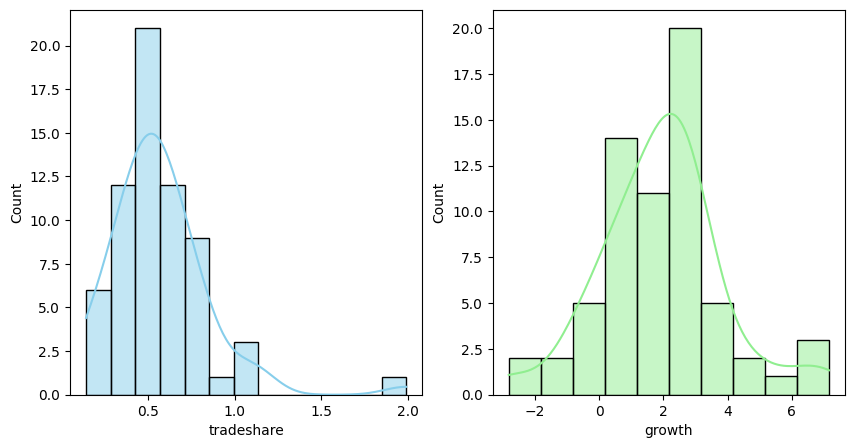

In [26]:
#histogram "tradeshare" vs. "growth" 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=numerical_df, x="growth", kde=True, color="lightgreen", ax=axs[1])
sns.histplot(data=numerical_df, x="tradeshare", kde=True, color="skyblue", ax=axs[0]);

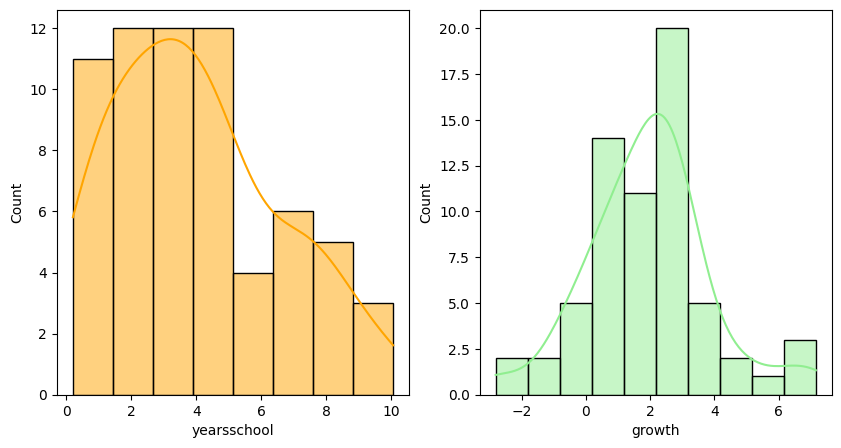

In [27]:
#histogram "yearsschool" vs. "growth" 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=numerical_df, x="growth", kde=True, color="lightgreen", ax=axs[1])
sns.histplot(data=numerical_df, x="yearsschool", kde=True, color="orange", ax=axs[0]);

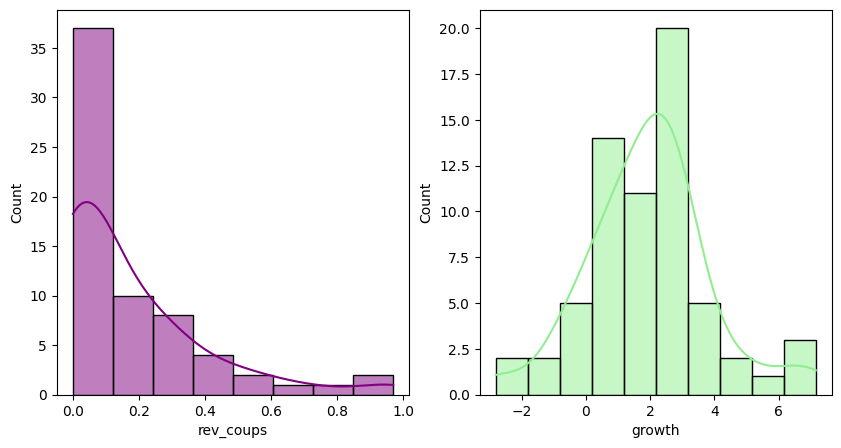

In [28]:
#histogram "rev_coups" vs. "growth" 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=numerical_df, x="growth", kde=True, color="lightgreen", ax=axs[1])
sns.histplot(data=numerical_df, x="rev_coups", kde=True, color="purple", ax=axs[0]);

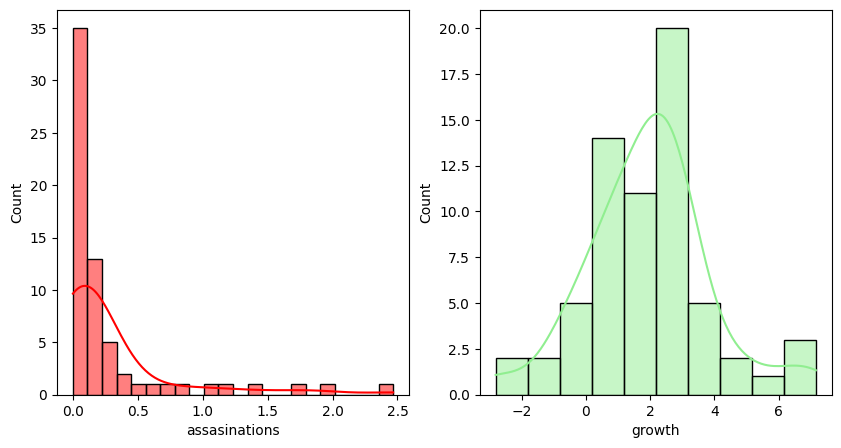

In [29]:
#histogram "assasinations" vs. "growth" 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=numerical_df, x="growth", kde=True, color="lightgreen", ax=axs[1])
sns.histplot(data=numerical_df, x="assasinations", kde=True, color="red", ax=axs[0]);

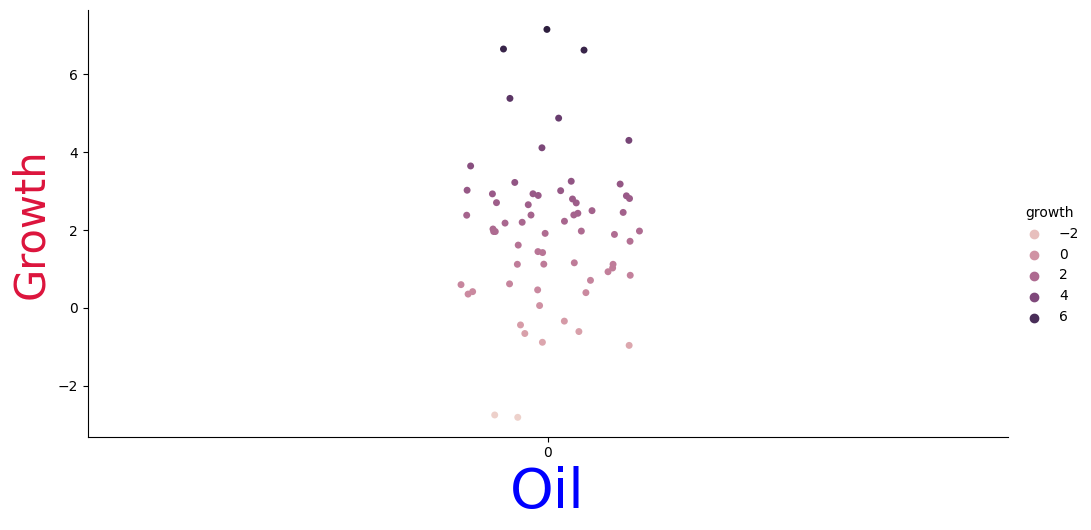

In [30]:
#scaterplot "oil" vs. "growth" 
sns.catplot(x = "oil" ,y = 'growth', hue='growth',data = numerical_df , aspect= 2)
plt.xlabel('Oil' , fontsize = 40 ,color = 'blue') 
plt.ylabel("Growth" , fontsize = 30 ,color = 'crimson')
plt.show()

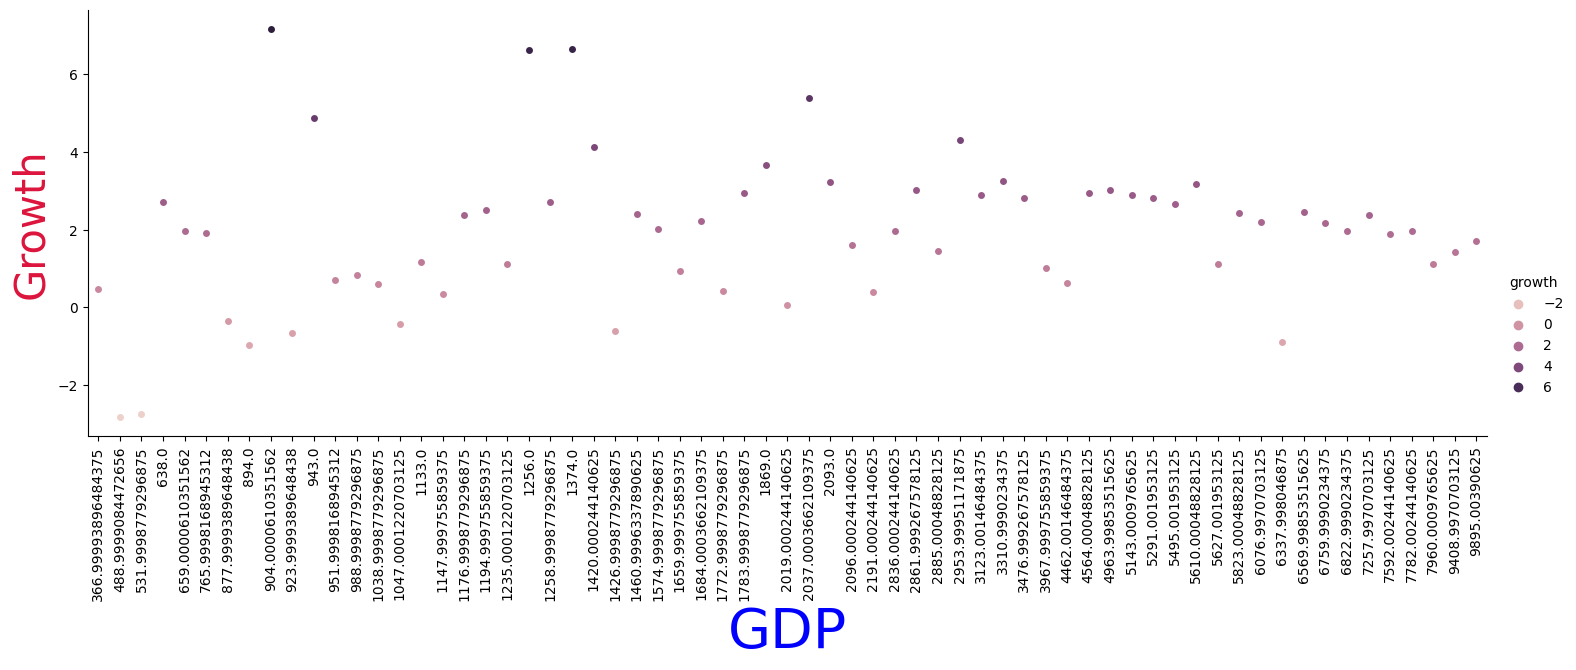

In [31]:
#scaterplot "rgdp60" vs. "growth" 
sns.catplot(x = "rgdp60" ,y = 'growth', hue='growth',data = numerical_df ,height=5, aspect= 3)
plt.xlabel('GDP' , fontsize = 40 ,color = 'blue') 
plt.ylabel("Growth" , fontsize = 30 ,color = 'crimson')
plt.xticks(rotation = 90)
plt.show()

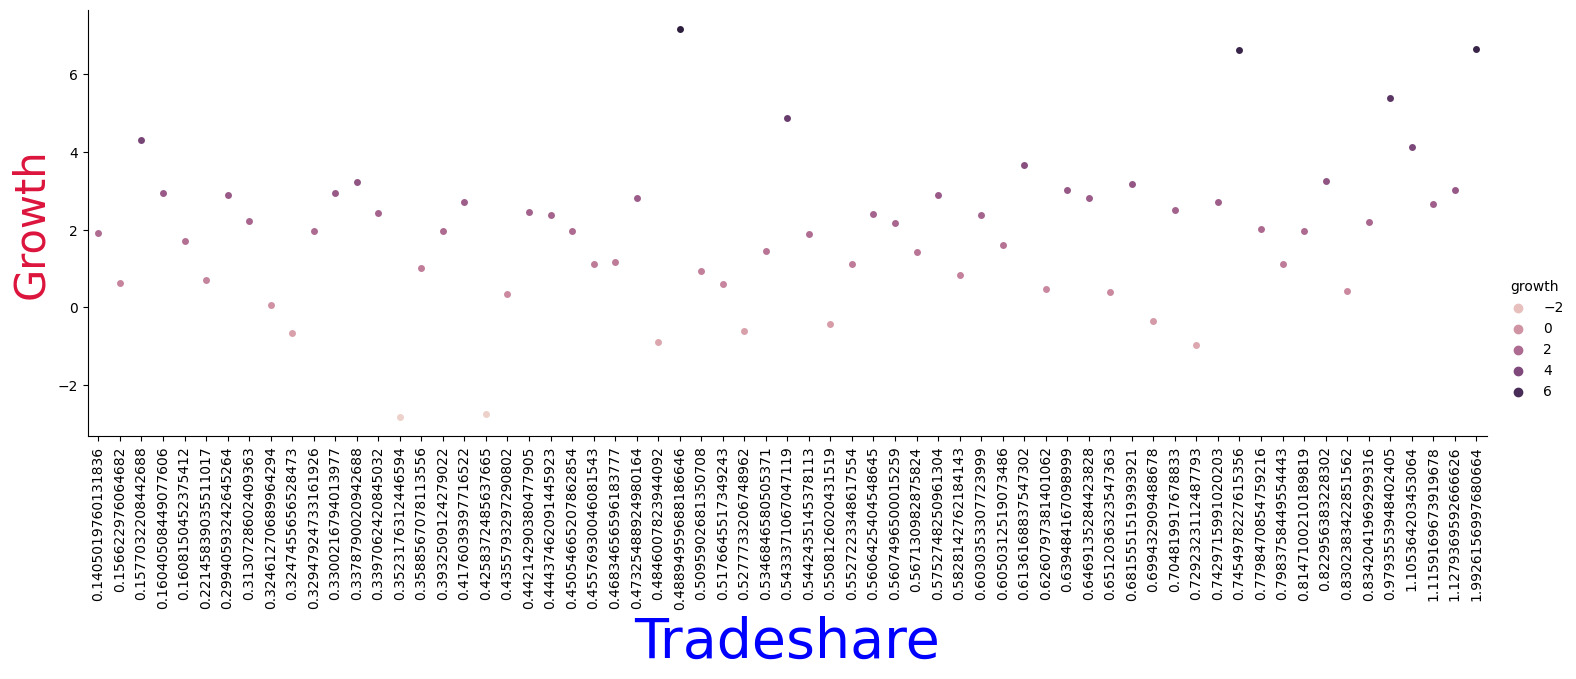

In [32]:
#scaterplot "tradeshare" vs. "growth" 
sns.catplot(x = "tradeshare" ,y = 'growth', hue='growth',data = numerical_df , aspect= 3)
plt.xlabel('Tradeshare' , fontsize = 40 ,color = 'blue') 
plt.ylabel("Growth" , fontsize = 30 ,color = 'crimson')
plt.xticks(rotation = 90)
plt.show()

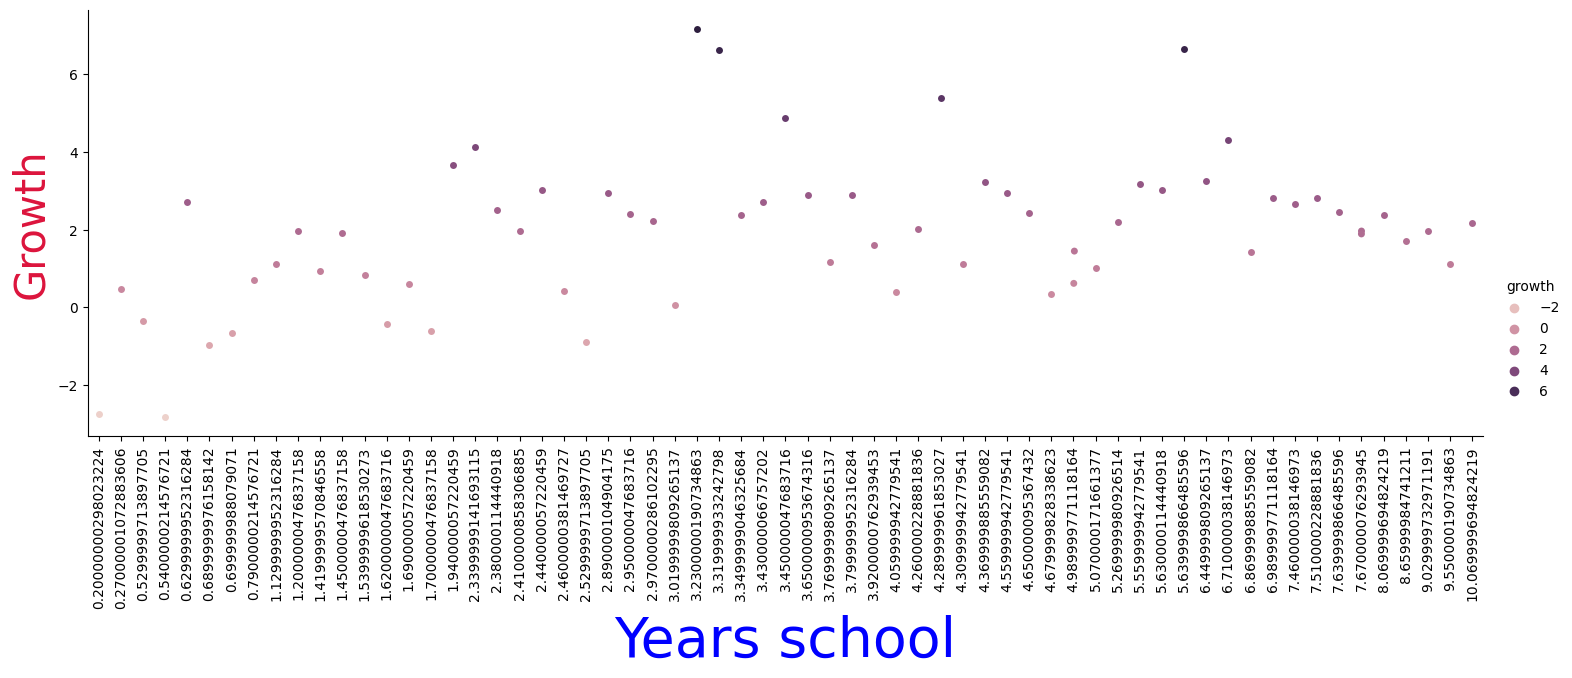

In [33]:
#scaterplot "yearsschool" vs. "growth" 
sns.catplot(x = "yearsschool" ,y = 'growth', hue='growth',data = numerical_df , aspect= 3)
plt.xlabel('Years school' , fontsize = 40 ,color = 'blue') 
plt.ylabel("Growth" , fontsize = 30 ,color = 'crimson')
plt.xticks(rotation = 90)
plt.show()

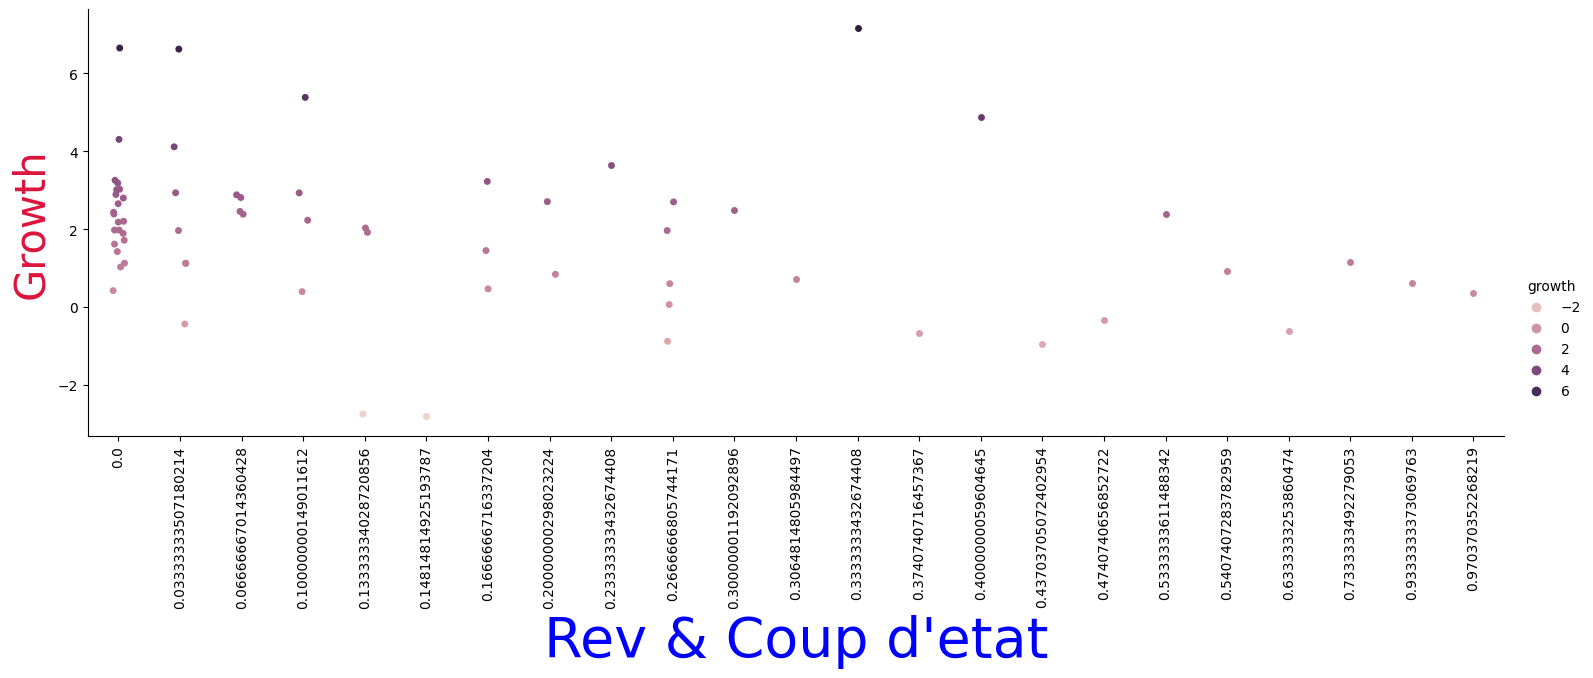

In [34]:
#scaterplot "rev_coups" vs. "growth" 
sns.catplot(x = "rev_coups" ,y = 'growth', hue='growth',data = numerical_df , aspect= 3)
plt.xlabel("Rev & Coup d'etat" , fontsize = 40 ,color = 'blue') 
plt.ylabel("Growth" , fontsize = 30 ,color = 'crimson')
plt.xticks(rotation = 90)
plt.show()

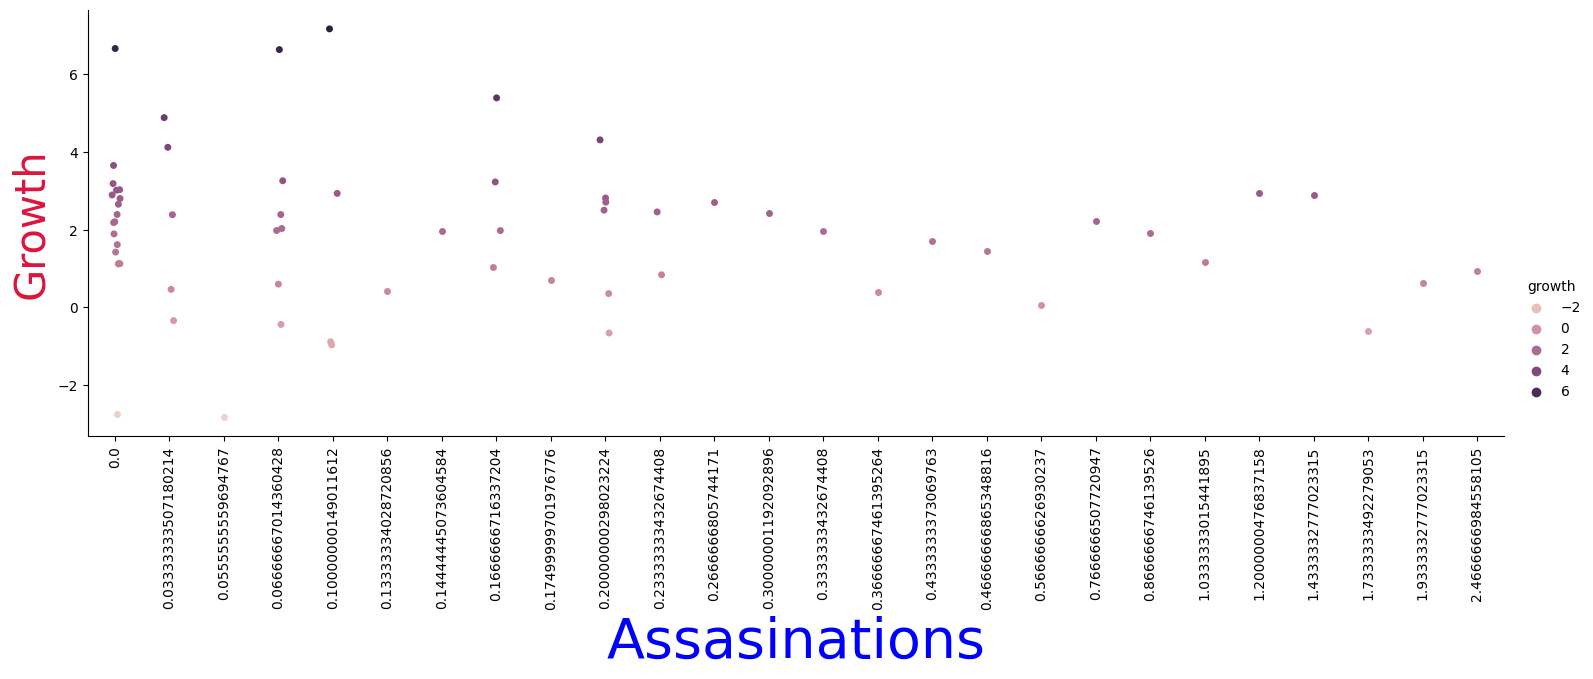

In [35]:
#scaterplot "assasinations" vs. "growth" 
sns.catplot(x = "assasinations" ,y = 'growth', hue='growth',data = numerical_df , aspect= 3)
plt.xlabel('Assasinations' , fontsize = 40 ,color = 'blue') 
plt.ylabel("Growth" , fontsize = 30 ,color = 'crimson')
plt.xticks(rotation = 90)
plt.show()

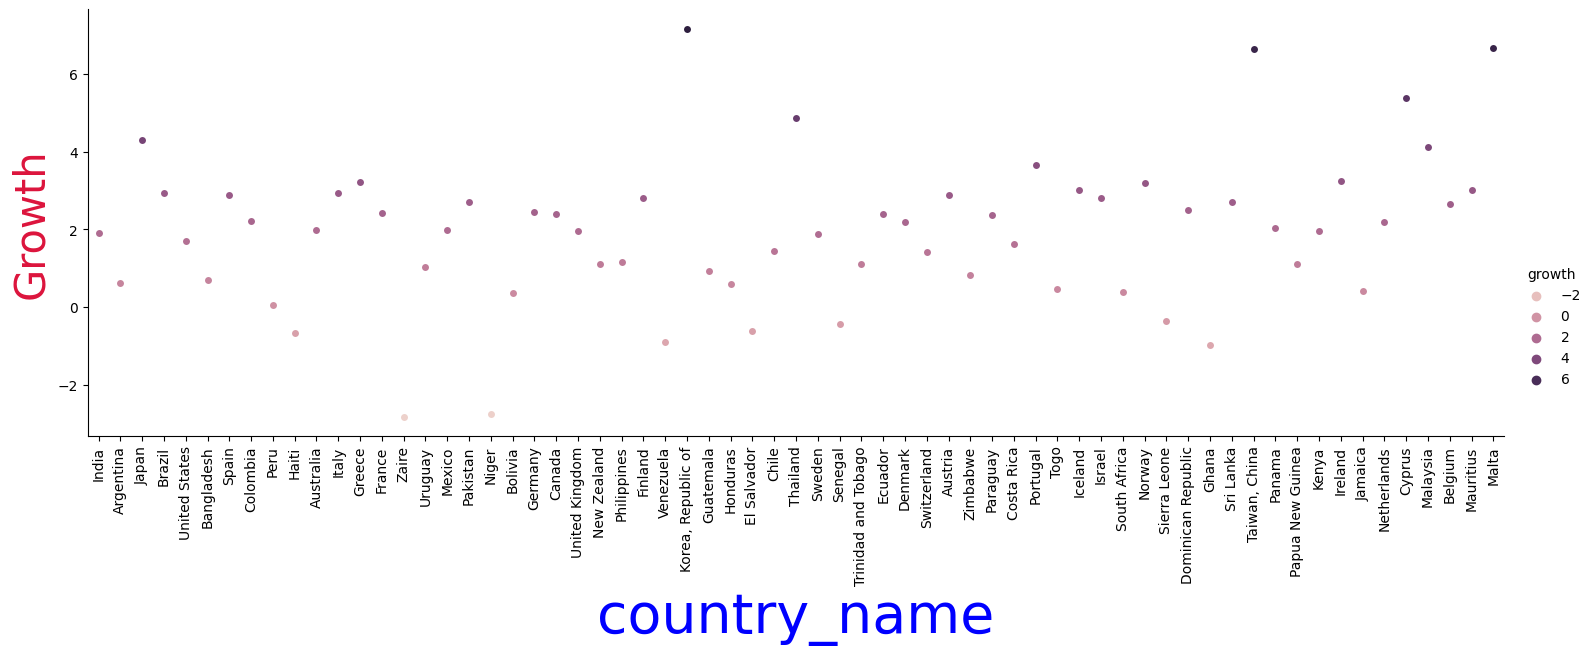

In [36]:
#scaterplot "country_name" vs. "growth" 
sns.catplot(x = "country_name" ,y = 'growth', hue='growth',data = df , aspect= 3)
plt.xlabel('country_name' , fontsize = 40 ,color = 'blue') 
plt.ylabel("Growth" , fontsize = 30 ,color = 'crimson')
plt.xticks(rotation = 90)
plt.show()

## Multiple Linear Regression

### Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=101) 

### Standardize

In [38]:
sc = StandardScaler()

In [39]:
sc.fit(X_train)
X_train_scaled =sc.transform(X_train)  #or only this script instead this 2 line "X_train_scaled =sc.transform(X_train) "

In [40]:
X_train_scaled

array([[ 0.        , -0.67107066, -0.29472304,  0.02296039,  2.71962389,
         1.44713275],
       [ 0.        ,  1.59832724, -0.37758951,  1.66533586, -0.46008376,
        -0.1998624 ],
       [ 0.        ,  1.00269985,  0.04342693, -0.02796593, -0.77805453,
        -0.68023601],
       [ 0.        , -0.44108364, -0.78576067, -0.31654873, -0.30109839,
         0.89813437],
       [ 0.        , -0.61847843,  0.57375128, -0.12133096,  0.17585776,
        -0.2684872 ],
       [ 0.        , -0.39934394, -1.2685573 , -0.35049962, -0.30109839,
        -0.4743616 ],
       [ 0.        , -0.64519202,  0.45310038, -0.5669367 ,  0.65281394,
        -0.2684872 ],
       [ 0.        , -0.65270515,  0.13121677, -0.15528194, -0.46008376,
        -0.61161121],
       [ 0.        , -0.40393533,  0.84972366, -0.53298581, -0.77805453,
        -0.40573679],
       [ 0.        , -0.77082902,  0.53030215, -1.28414982,  1.30642051,
        -0.4743616 ],
       [ 0.        , -0.55127703,  1.7197818 , -0.

In [41]:
column = X.columns

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = column)

In [43]:
X_train_scaled 

,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,0.0,-0.671071,-0.294723,0.022960,2.719624,1.447133
1,0.0,1.598327,-0.377590,1.665336,-0.460084,-0.199862
2,0.0,1.002700,0.043427,-0.027966,-0.778055,-0.680236
3,0.0,-0.441084,-0.785761,-0.316549,-0.301098,0.898134
4,0.0,-0.618478,0.573751,-0.121331,0.175858,-0.268487
5,0.0,-0.399344,-1.268557,-0.350500,-0.301098,-0.474362
6,0.0,-0.645192,0.453100,-0.566937,0.652814,-0.268487
7,0.0,-0.652705,0.131217,-0.155282,-0.460084,-0.611611
8,0.0,-0.403935,0.849724,-0.532986,-0.778055,-0.405737
9,0.0,-0.770829,0.530302,-1.284150,1.306421,-0.474362


In [44]:
X_test_scaled = sc.transform(X_test)

In [45]:
X_test_scaled = pd.DataFrame(X_test_scaled , columns= column)

In [46]:
X_test_scaled

,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,0.0,1.501490,-0.243321,-0.503279,0.493829,-0.474362
1,0.0,0.238024,0.826695,1.160316,-0.778055,-0.542986
2,0.0,0.089013,-1.277102,1.270657,-0.778055,-0.268487
3,0.0,1.703929,-0.351013,1.678068,0.493829,0.006012
4,0.0,1.885497,-0.370532,1.847822,-0.778055,-0.542986
5,0.0,-0.534164,-0.002846,-0.325036,1.765712,-0.680236
6,0.0,0.050612,1.791166,-0.541474,-0.778055,-0.680236
7,0.0,-0.777507,0.436065,-1.352052,1.483071,-0.611611
8,0.0,-0.293742,1.321291,0.243641,-0.301098,-0.337112
9,0.0,1.677633,-0.002507,2.696595,-0.778055,-0.680236


In [47]:
X_train_scaled

,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,0.0,-0.671071,-0.294723,0.022960,2.719624,1.447133
1,0.0,1.598327,-0.377590,1.665336,-0.460084,-0.199862
2,0.0,1.002700,0.043427,-0.027966,-0.778055,-0.680236
3,0.0,-0.441084,-0.785761,-0.316549,-0.301098,0.898134
4,0.0,-0.618478,0.573751,-0.121331,0.175858,-0.268487
5,0.0,-0.399344,-1.268557,-0.350500,-0.301098,-0.474362
6,0.0,-0.645192,0.453100,-0.566937,0.652814,-0.268487
7,0.0,-0.652705,0.131217,-0.155282,-0.460084,-0.611611
8,0.0,-0.403935,0.849724,-0.532986,-0.778055,-0.405737
9,0.0,-0.770829,0.530302,-1.284150,1.306421,-0.474362


In [48]:
X_train = X_train_scaled
X_test = X_test_scaled

### Creating and Training the Model

In [49]:
lm = LinearRegression() # --> Estimator 

In [50]:
lm.fit(X_train , Y_train) # --> Instantiate the model with X_train and Y_train

LinearRegression()

### Find Model Coefficients
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [51]:
# print the intercept(b0)
print(lm.intercept_)

1.9711574474588418


In [52]:
# print the coefficients(b1, b2, ...)
print(lm.coef_)

[ 0.         -0.82276329  0.49269667  0.96229083 -0.76138223  0.29309022]


### Prediction 

In [53]:
prediction = lm.predict(X_test)

In [54]:
prediction

array([-0.3834207 ,  3.7324443 ,  3.00514433,  1.63684247,  2.44867476,
        0.55271398,  2.68398862,  0.2162016 ,  3.22873387,  3.5775618 ,
        2.28599694, -0.56030955,  1.63651465,  0.68544119,  2.07321246,
        1.48081329,  1.370958  ,  2.28047223,  1.41214156,  2.90025899,
        0.99124099,  1.53327301,  2.73671401,  1.01002985,  3.8111164 ,
        1.17210868])

### Visual Evaluate

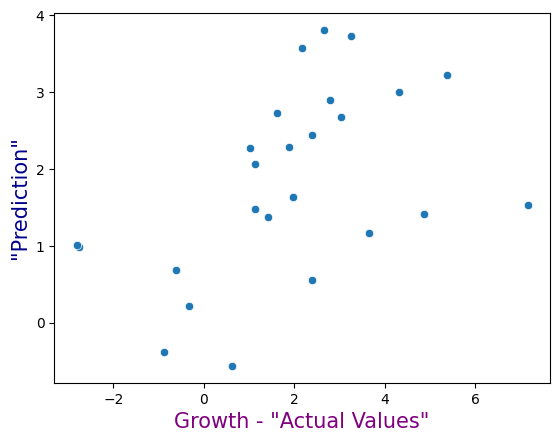

In [67]:
sns.scatterplot(x=Y_test , y=prediction )
plt.xlabel('Growth - "Actual Values"' , fontsize = 15 , color = 'purple')
plt.ylabel('"Prediction"' , fontsize = 15 , color = 'darkblue');

**Residual Histogram**

In [68]:
residual = (Y_test - prediction)

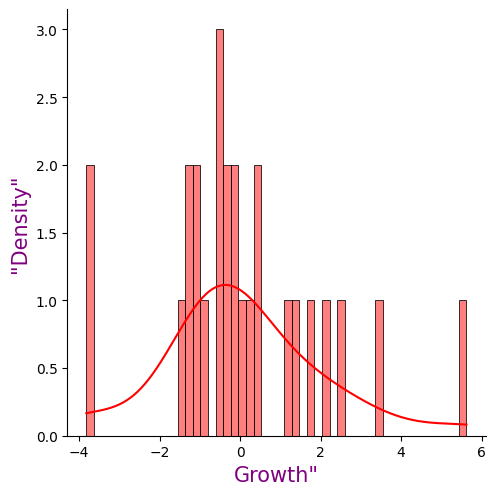

In [108]:
sns.displot(residual , bins= 50 ,kde = True , color = 'red')
plt.xlabel('Growth"' , fontsize = 15 , color = 'purple')
plt.ylabel('"Density"' , fontsize = 15 , color = 'purple');

### Regression Evaluation Metrics


**R^2(Coefficient of Determination)**:

We can use the score() method of the linear regression model in scikit-learn to calculate the R^2 score. The score() method returns the coefficient of determination, which is equivalent to R^2 . 

In [141]:
r2_score = r2_score(Y_test , prediction)
r2_score

0.22983252016047873

**SSR (Sum of Squared Residuals)**:

Calculate the SSR using the residuals between the test target variable (y_test) and the predicted values (y_pred).

In [126]:
ssr = np.sum((Y_test - prediction) ** 2)
ssr

99.60538967043664

**ESS (Explained Sum of Squares)**:

Calculate the ESS using the predicted values (y_pred) obtained from the model and the mean of the test target variable (y_test).

In [129]:
ess = np.sum((prediction - np.mean(Y_test)) ** 2)
ess

36.25868448882642

**TSS (Total Sum of Squares)**:

Calculate the TSS using the test target variable (y_test) by considering the deviations from the mean of the test target variable.

In [132]:
tss = np.sum((Y_test - np.mean(Y_test)) ** 2)
tss

129.32951893942766

**SER (Standard Error of the Regression)**:

it represents the standard deviation of the residuals in linear regression. It provides a measure of the average distance between the observed target values and the predicted values by the regression model.

In [140]:
prediction_train = lm.predict(X_train)
residuals_train = Y_train - prediction_train
ser = np.std(residuals_train)
ser

1.20699654710761


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [146]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1.3957222710108685
MSE: 3.8309765257860247
RMSE: 1.9572880538607558


In [148]:
pickle.dump(lm, open('Growth.pkl','wb'))

In [149]:
growth_model_pk=pickle.load(open('Growth.pkl','rb'))

*Written by Kasra Tehrani*  
*https://www.linkedin.com/in/kasra-naderi-tehrani-a298b521b/* - 
*https://github.com/kasra-python* - 
*kasra.n.tehrani@gmail.com* 

*Good luck!*